In [1]:
import yaml
import os
import sys
import torch
from utils import *
from models import *
from tqdm import tqdm
import pickle as pkl
from datetime import datetime
import matplotlib.pyplot as plt

ckpt = 'ckpt/autoencoder_2025-04-03-11-45.pth'


with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)

test_set = CXRDataset(config["data"]["root_dir"], transform=get_transform(), split='test')

with open(ckpt, "rb") as f:
    state_dict = torch.load(f, map_location="cpu")
    # Load the model state dict

model = get_model(config["model"])
model.load_state_dict(state_dict, strict=False)
model = model.to(config["device"])

/tmp/ipykernel_233875/1802103865.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f, map_location="cpu")


In [5]:
import numpy as np

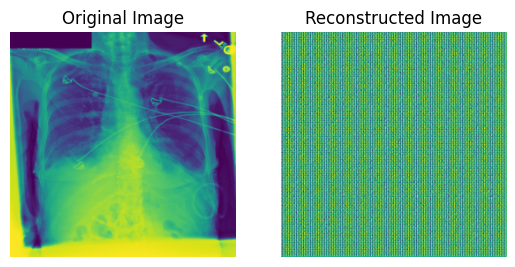

MSE: 0.13622067868709564


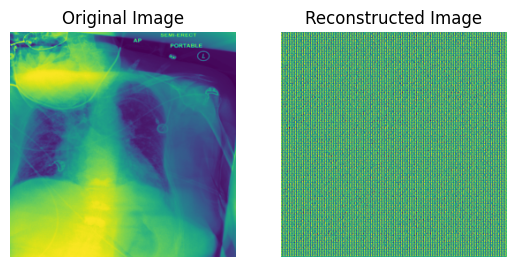

MSE: 0.13340000808238983


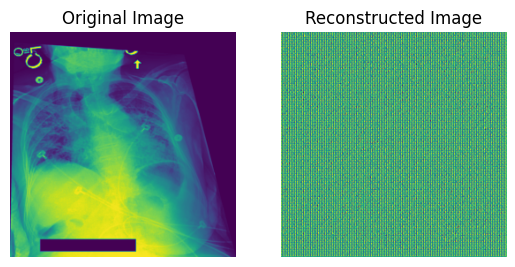

MSE: 0.18456874787807465


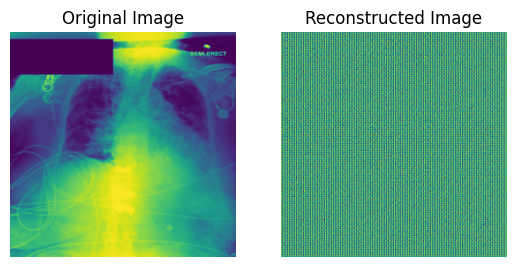

MSE: 0.14413979649543762


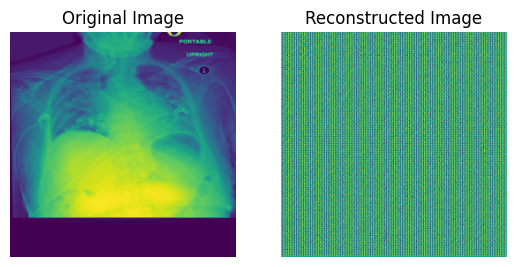

MSE: 0.16645705699920654


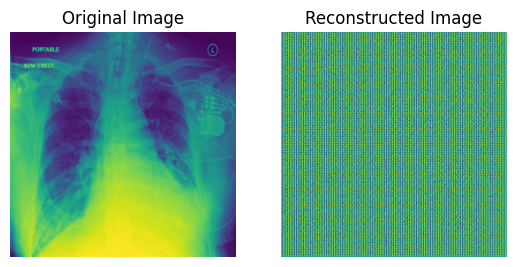

MSE: 0.13143901526927948


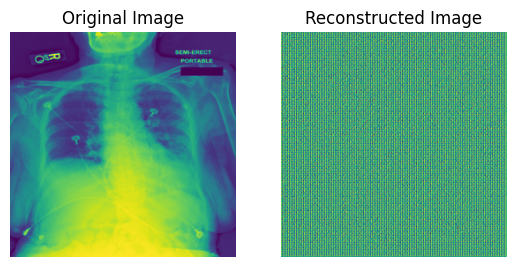

MSE: 0.12637121975421906


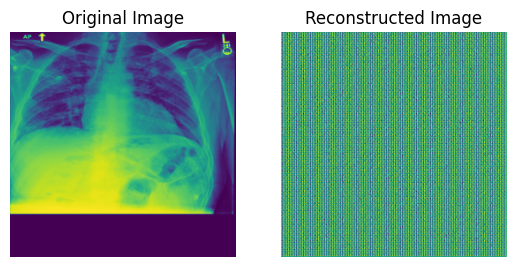

MSE: 0.17560873925685883


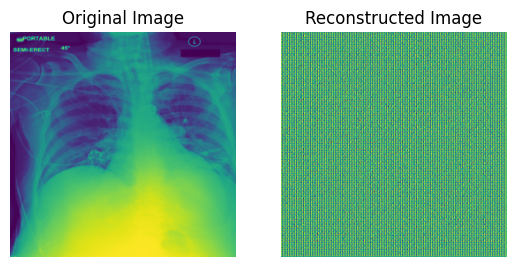

MSE: 0.13425639271736145


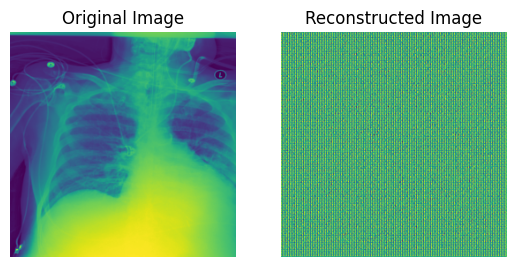

MSE: 0.12895552814006805


In [6]:
# pick 10 random images
indices = torch.randint(0, len(test_set), (10,))

for i in indices:
    img = test_set[i]["image"]
    img = img.unsqueeze(0).to(config["device"])
    with torch.no_grad():
        recon_img, _ = model(img)
        recon_img = recon_img.squeeze(0).cpu()
        img = img.squeeze(0).cpu()

    # display images
    img = img.permute(1, 2, 0).numpy()
    recon_img = recon_img.permute(1, 2, 0).numpy()
    img = (img - img.min()) / (img.max() - img.min())
    recon_img = (recon_img - recon_img.min()) / (recon_img.max() - recon_img.min())
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(recon_img)
    plt.title("Reconstructed Image")
    plt.axis("off")
    plt.show()
    
    # print MSE between reconstructed and original image
    mse = np.mean((img - recon_img) ** 2)
    print(f"MSE: {mse.item()}")